In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

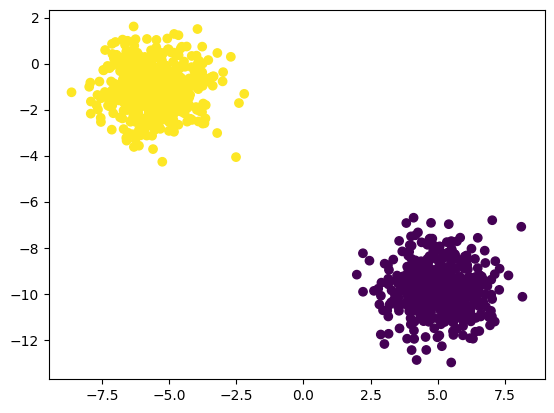

In [3]:
X,y = make_blobs(1000,2,centers=2)
plt.scatter(X[:,0],X[:,1],c=y)

In [2]:
class MLP:
    def __init__(self,inputL,hiddenL,outputL):  # input layer, hidden layers, output layers
        self.length = len(hiddenL)
        self.weights = []
        self.bias = []

        self.weights.append(np.random.normal(0,1/np.sqrt(inputL),size=(inputL,hiddenL[0])))   #np.zeros((inputL,hiddenL[0]))
        self.bias.append(np.zeros((hiddenL[0],)))

        for i in range(1,len(hiddenL)):
            self.weights.append(np.random.normal(0,1/np.sqrt(hiddenL[i-1]),size=(hiddenL[i-1],hiddenL[i])))
            self.bias.append(np.zeros((hiddenL[i],)))

        self.weights.append(np.random.normal(0,1/np.sqrt(hiddenL[-1]),size=(hiddenL[-1],outputL)))
        self.bias.append(np.zeros((outputL,)))


    def activation(self,Z):
        return 1/(1+np.exp(-Z))

    def fit(self,X,y,lr = 0.01,epochs = 1000):
        self.backward(X,y,lr,epochs)

    def forward(self,X):  # forward_propagation

        A= X
        self.output = [A]
        for i in range(len(self.weights)):
            Z = A@self.weights[i]+self.bias[i]
            A= self.activation(Z)
            self.output.append(A)

        return A

    def derA(self,Z):   #derivative of activation function
        return Z*(1-Z)


    def backward(self,X,y,lr=0.01,epochs = 100):

        for e in range(epochs):
            ypred = self.forward(X)

            delta = [ypred-y]
            gradw = [self.output[-2].T@delta[-1]]

            for i in range(len(self.weights)-1,0,-1):
                delta.append((delta[-1]@self.weights[i].T)*self.derA(self.output[i]))
                gradw.append(self.output[i-1].T@delta[-1])



            wn = len(self.weights)-1
            for i in range(len(gradw)):
                self.weights[wn] = self.weights[wn]-lr*gradw[i]
                self.bias[wn] = self.bias[wn]-lr*np.sum(delta[i],axis=0)
                wn -= 1

    def predict(self,X):
        ypred = self.forward(X)
        ypred[ypred >=0.5] =1
        ypred[ypred <0.5] =0
        return ypred


In [4]:
clf = MLP(2,[4,5,6],1)


In [5]:

y.shape


(1000,)

In [6]:
clf.fit(X,y.reshape((-1,1)))

In [7]:
np.mean(clf.predict(X).reshape(-1)==y)


1.0